In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Generate Data

In [2]:
X, y = make_circles(n_samples = 1000, 
                    factor=0.85, 
                    random_state=2021, 
                    noise=0.1)

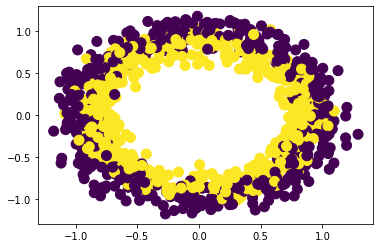

In [3]:
plt.scatter(X[:,0],X[:,1], 
            c=y, s=100)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [5]:
def get_model(inp_activation):
  model = Sequential()
  model.add(Dense(10,input_dim=2, activation=inp_activation))
  model.add(Dense(32, activation = inp_activation))
  model.add(Dense(32, activation = inp_activation))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [6]:
def plot_performance(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper right')
  return plt.show()

# Model with all weights = 1

In [7]:
model_1 = get_model("relu")

In [8]:
initial_weights = model_1.get_weights()

In [9]:
initial_weights[0] = np.ones(initial_weights[0].shape)
initial_weights[2] = np.ones(initial_weights[2].shape)
initial_weights[4] = np.ones(initial_weights[4].shape)
initial_weights[6] = np.ones(initial_weights[6].shape)

In [10]:
model_1.set_weights(initial_weights)

In [11]:
model_1_history = model_1.fit(X_train, y_train, epochs = 200, 
                              validation_data = (X_test, y_test),
                              verbose=0)

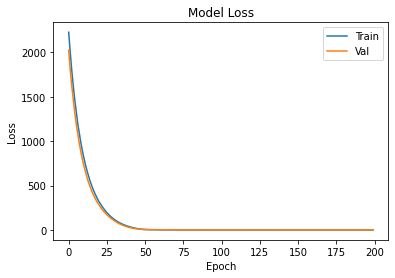

In [12]:
plot_performance(model_1_history)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


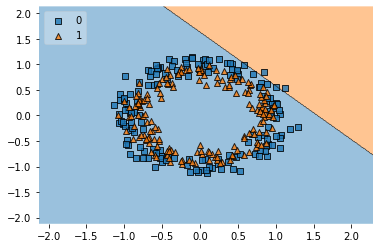

In [13]:
plot_decision_regions(X_test, y_test.ravel(), clf = model_1, legend=2)
plt.show()

# Model With Small Weights

In [14]:
model_2 = get_model("relu")

In [15]:
small_weight = 0.000001

In [16]:
initial_weights = model_2.get_weights()

In [17]:
initial_weights[0]

array([[-0.5625857 ,  0.21231222,  0.03970218, -0.3716182 ,  0.16325158,
        -0.38948578,  0.10553521, -0.15975207,  0.4387986 , -0.13941318],
       [ 0.1796115 , -0.01111466,  0.08855104,  0.28118455,  0.7014294 ,
         0.5539488 , -0.6586553 , -0.20681542, -0.4275899 ,  0.24127686]],
      dtype=float32)

In [18]:
initial_weights[0] = small_weight * np.ones(initial_weights[0].shape)

In [19]:
initial_weights[0]

array([[1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
        1.e-06, 1.e-06],
       [1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
        1.e-06, 1.e-06]])

In [20]:
initial_weights[2] = small_weight * np.ones(initial_weights[2].shape)
initial_weights[4] = small_weight * np.ones(initial_weights[4].shape)
initial_weights[6] = small_weight * np.ones(initial_weights[6].shape)

In [21]:
model_2.set_weights(initial_weights)

In [22]:
model_2_history = model_2.fit(X_train, y_train, epochs = 200, 
                              validation_data = (X_test, y_test),
                              verbose=0)

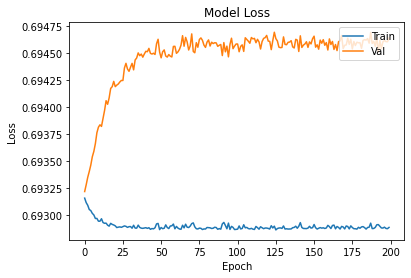

In [23]:
plot_performance(model_2_history)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


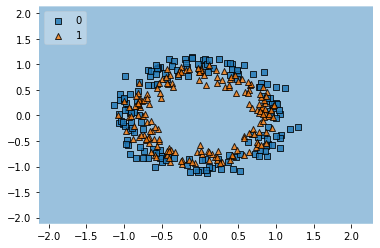

In [24]:
plot_decision_regions(X_test, y_test.ravel(), clf = model_2, legend=2)
plt.show()

# Model With Large Weights

In [25]:
model_3 = get_model("relu")

In [26]:
initial_weights_3 = model_3.get_weights()

In [27]:
initial_weights_3[0] = 50 * np.ones(initial_weights_3[0].shape)
initial_weights_3[2] = 50 * np.ones(initial_weights_3[2].shape)
initial_weights_3[4] = 50 * np.ones(initial_weights_3[4].shape)
initial_weights_3[6] = 50 * np.ones(initial_weights_3[6].shape)

In [28]:
model_3.set_weights(initial_weights_3)

In [29]:
model_3_history = model_3.fit(X_train, y_train, epochs = 200, 
                              validation_data = (X_test, y_test),
                              verbose=0)

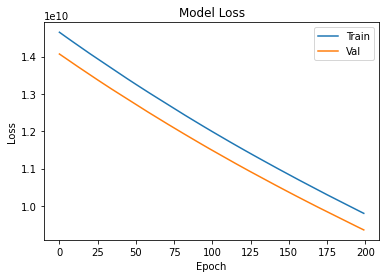

In [30]:
plot_performance(model_3_history)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


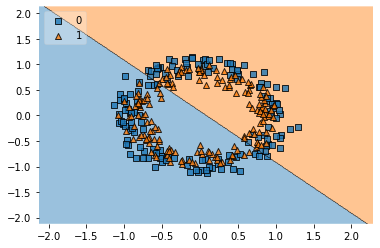

In [31]:
plot_decision_regions(X_test, y_test.ravel(), clf = model_3, legend=2)
plt.show()

# Model With Xavier Initialization

In [32]:
model = Sequential()
model.add(Dense(10,input_dim=2, activation="relu", 
                kernel_initializer='glorot_normal',
                bias_initializer='zeros'))
model.add(Dense(32, activation = "relu",
                kernel_initializer='glorot_normal',
                bias_initializer='zeros'))
model.add(Dense(32, activation = "relu",
                kernel_initializer='glorot_normal',
                bias_initializer='zeros'))
model.add(Dense(1, activation="sigmoid",
                kernel_initializer='glorot_normal',
                bias_initializer='zeros'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
xavier_weights = model.get_weights()

In [34]:
xavier_weights[0]

array([[-0.23446772,  0.84715426, -0.39028162,  0.02558597, -0.75835   ,
        -0.86911255, -0.31904456,  0.3740592 ,  0.06253068, -0.1637433 ],
       [ 0.7957439 , -0.33402205, -0.6825086 ,  0.18427147, -0.03204363,
         0.15726331, -0.8415801 ,  0.36313713,  0.51367664, -0.02106884]],
      dtype=float32)

In [35]:
model_history = model.fit(X_train, y_train, epochs = 200, 
                          validation_data = (X_test, y_test))

Epoch 1/200
21/21 [==============================] - 0s 12ms/step - loss: 0.6973 - accuracy: 0.4925 - val_loss: 0.6958 - val_accuracy: 0.4939
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.4910 - val_loss: 0.6938 - val_accuracy: 0.4848
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.4701 - val_loss: 0.6932 - val_accuracy: 0.4455
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5045 - val_loss: 0.6915 - val_accuracy: 0.4909
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6872 - accuracy: 0.5134 - val_loss: 0.6898 - val_accuracy: 0.4788
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6861 - accuracy: 0.5224 - val_loss: 0.6892 - val_accuracy: 0.4848
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.5119 - val_loss: 0.6867 - val_accuracy: 0.4848
Epoch 8/200


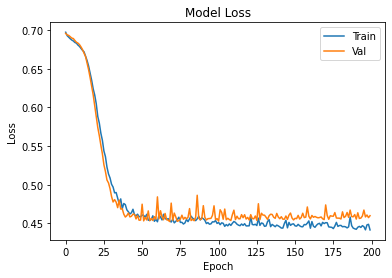

In [36]:
plot_performance(model_history)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


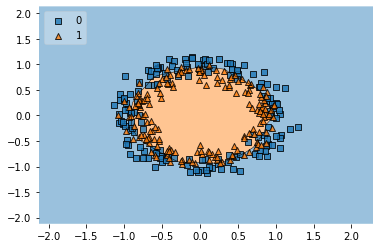

In [37]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Model with He Initialization

In [38]:
model = Sequential()
model.add(Dense(10,input_dim=2, activation="relu", 
                kernel_initializer='he_normal',
                bias_initializer='zeros'))
model.add(Dense(32, activation = "relu",
                kernel_initializer='he_normal',
                bias_initializer='zeros'))
model.add(Dense(32, activation = "relu",
                kernel_initializer='he_normal',
                bias_initializer='zeros'))
model.add(Dense(1, activation="sigmoid",
                kernel_initializer='he_normal',
                bias_initializer='zeros'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
model_history = model.fit(X_train, y_train, epochs = 200, 
                          validation_data = (X_test, y_test))

Epoch 1/200
21/21 [==============================] - 0s 12ms/step - loss: 0.7406 - accuracy: 0.4985 - val_loss: 0.7064 - val_accuracy: 0.4970
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.7037 - accuracy: 0.4806 - val_loss: 0.6972 - val_accuracy: 0.4818
Epoch 3/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.4985 - val_loss: 0.6955 - val_accuracy: 0.4818
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5194 - val_loss: 0.6931 - val_accuracy: 0.4848
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6869 - accuracy: 0.5179 - val_loss: 0.6926 - val_accuracy: 0.4788
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.5507 - val_loss: 0.6907 - val_accuracy: 0.4848
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.5299 - val_loss: 0.6893 - val_accuracy: 0.4848
Epoch 8/200


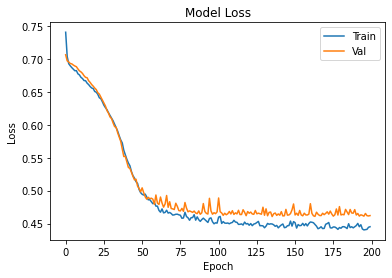

In [40]:
plot_performance(model_history)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


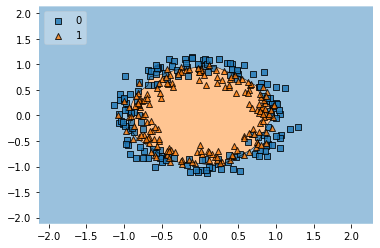

In [41]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()